In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer


In [10]:
df = pd.read_csv("smoking-v1.csv")

In [11]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38.0,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42.0,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40.0,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,NaN,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39.0,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


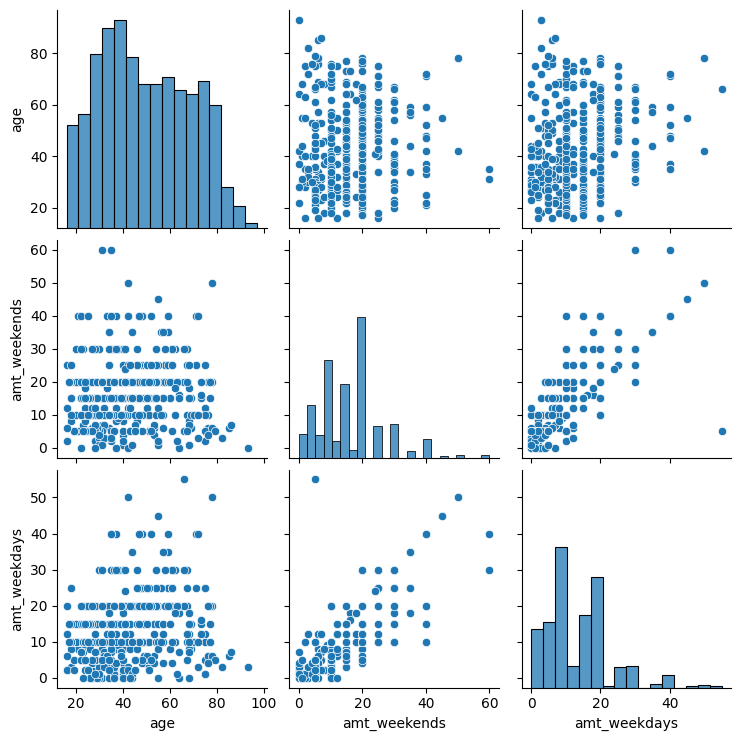

In [12]:
sns.pairplot(df)

<Axes: >

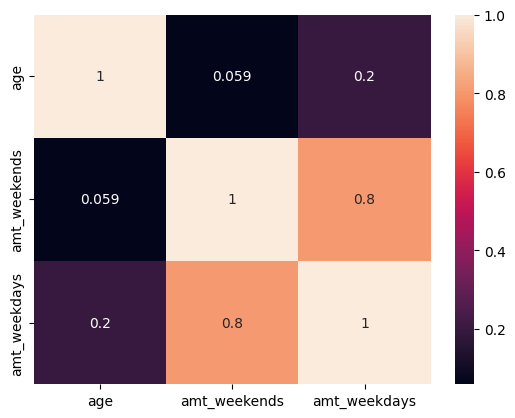

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [14]:
df.isna().sum()

gender                      0
age                        98
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income               75
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1593 non-null   float64
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1616 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(3), object(9)
memory usage: 158.7+ KB


In [16]:
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1616 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 158.7+ KB


In [17]:
df["marital_status"].unique()

array(['Divorced', 'Single', 'Married', 'Widowed', 'Separated'],
      dtype=object)

In [21]:
one_hot_encoded_values = pd.get_dummies(df["marital_status"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.drop(columns="marital_status", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   object 
 3   nationality            1691 non-null   object 
 4   ethnicity              1691 non-null   object 
 5   gross_income           1616 non-null   object 
 6   region                 1691 non-null   object 
 7   smoke                  1691 non-null   object 
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [22]:
df["highest_qualification"].value_counts()

highest_qualification
No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: count, dtype: int64

In [23]:
label_encoder = LabelEncoder()
df["highest_qualification"] = label_encoder.fit_transform(df["highest_qualification"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   object 
 4   ethnicity              1691 non-null   object 
 5   gross_income           1616 non-null   object 
 6   region                 1691 non-null   object 
 7   smoke                  1691 non-null   object 
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [24]:
df["nationality"].value_counts()

nationality
English     833
British     538
Scottish    142
Other        71
Welsh        66
Irish        23
Refused      17
Unknown       1
Name: count, dtype: int64

In [25]:
label_encoder = LabelEncoder()
df["nationality"] = label_encoder.fit_transform(df["nationality"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   int64  
 4   ethnicity              1691 non-null   object 
 5   gross_income           1616 non-null   object 
 6   region                 1691 non-null   object 
 7   smoke                  1691 non-null   object 
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [26]:
df["ethnicity"].value_counts()

ethnicity
White      1560
Asian        41
Black        34
Chinese      27
Mixed        14
Refused      13
Unknown       2
Name: count, dtype: int64

In [27]:
label_encoder = LabelEncoder()
df["ethnicity"] = label_encoder.fit_transform(df["ethnicity"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   int64  
 4   ethnicity              1691 non-null   int64  
 5   gross_income           1616 non-null   object 
 6   region                 1691 non-null   object 
 7   smoke                  1691 non-null   object 
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [28]:
df["gross_income"].unique()

array(['2,600 to 5,200', 'Under 2,600', '28,600 to 36,400',
       '10,400 to 15,600', '15,600 to 20,800', 'Above 36,400',
       '5,200 to 10,400', 'Refused', '20,800 to 28,600', 'Unknown', nan],
      dtype=object)

In [30]:
df["gross_income"] = df["gross_income"].fillna("Unknown")
df["gross_income"].isna().sum()

np.int64(0)

In [31]:
categories = [
    "Under 2,600",
    "2,600 to 5,200",
    "5,200 to 10,400",
    "10,400 to 15,600",
    "15,600 to 20,800",
    "20,800 to 28,600",
    "28,600 to 36,400",
    "Above 36,400",
    "Refused",
    "Unknown"
]
ordinal_encoder = OrdinalEncoder(categories=[categories])
df[["gross_income"]] = ordinal_encoder.fit_transform(df[["gross_income"]])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   int64  
 4   ethnicity              1691 non-null   int64  
 5   gross_income           1691 non-null   float64
 6   region                 1691 non-null   object 
 7   smoke                  1691 non-null   object 
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [32]:
df["region"].unique()

array(['The North', 'Midlands & East Anglia', 'London', 'South East',
       'South West', 'Wales', 'Scotland'], dtype=object)

In [33]:
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   int64  
 4   ethnicity              1691 non-null   int64  
 5   gross_income           1691 non-null   float64
 6   region                 1691 non-null   int64  
 7   smoke                  1691 non-null   object 
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [34]:
df.head()

,gender,age,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,Divorced,Married,Separated,Single,Widowed,Divorced,Married,Separated,Single,Widowed,Divorced,Married,Separated,Single,Widowed
0,1,38.0,5,0,6,1.0,5,No,NaN,NaN,NaN,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1,0,42.0,5,0,6,0.0,5,Yes,12.0,12.0,Packets,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,1,40.0,1,1,6,6.0,5,No,NaN,NaN,NaN,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
3,0,NaN,1,1,6,3.0,5,No,NaN,NaN,NaN,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
4,0,39.0,3,0,6,1.0,5,No,NaN,NaN,NaN,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False


In [35]:
label_encoder = LabelEncoder()
df["smoke"] = label_encoder.fit_transform(df["smoke"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1593 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   int64  
 4   ethnicity              1691 non-null   int64  
 5   gross_income           1691 non-null   float64
 6   region                 1691 non-null   int64  
 7   smoke                  1691 non-null   int64  
 8   amt_weekends           421 non-null    float64
 9   amt_weekdays           421 non-null    float64
 10  type                   421 non-null    object 
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [36]:
df.isna().sum()

gender                      0
age                        98
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
dtype: int64

In [37]:
df["type"].unique()

array([nan, 'Packets', 'Hand-Rolled', 'Both/Mainly Packets',
       'Both/Mainly Hand-Rolled'], dtype=object)

In [46]:
label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
label_encoder.classes_

array([ 0.,  1.,  2.,  3., nan])

In [47]:
df["type"] = df["type"].replace(4, np.nan)
df["type"].isna().sum()

np.int64(1270)

In [54]:
knn_imputer = KNNImputer(n_neighbors=5)
df[["type"]] = knn_imputer.fit_transform(df[["type"]])
df["type"].isna().sum()

np.int64(0)

In [55]:
df.head()

,gender,age,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,Divorced,Married,Separated,Single,Widowed,Divorced,Married,Separated,Single,Widowed,Divorced,Married,Separated,Single,Widowed
0,1,38.0,5,0,6,1.0,5,0,NaN,NaN,2.558195,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1,0,42.0,5,0,6,0.0,5,1,12.0,12.0,3.000000,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,1,40.0,1,1,6,6.0,5,0,NaN,NaN,2.558195,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
3,0,NaN,1,1,6,3.0,5,0,NaN,NaN,2.558195,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
4,0,39.0,3,0,6,1.0,5,0,NaN,NaN,2.558195,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False


In [56]:
df.isna().sum()

gender                      0
age                        98
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                        0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
dtype: int64

<Axes: >

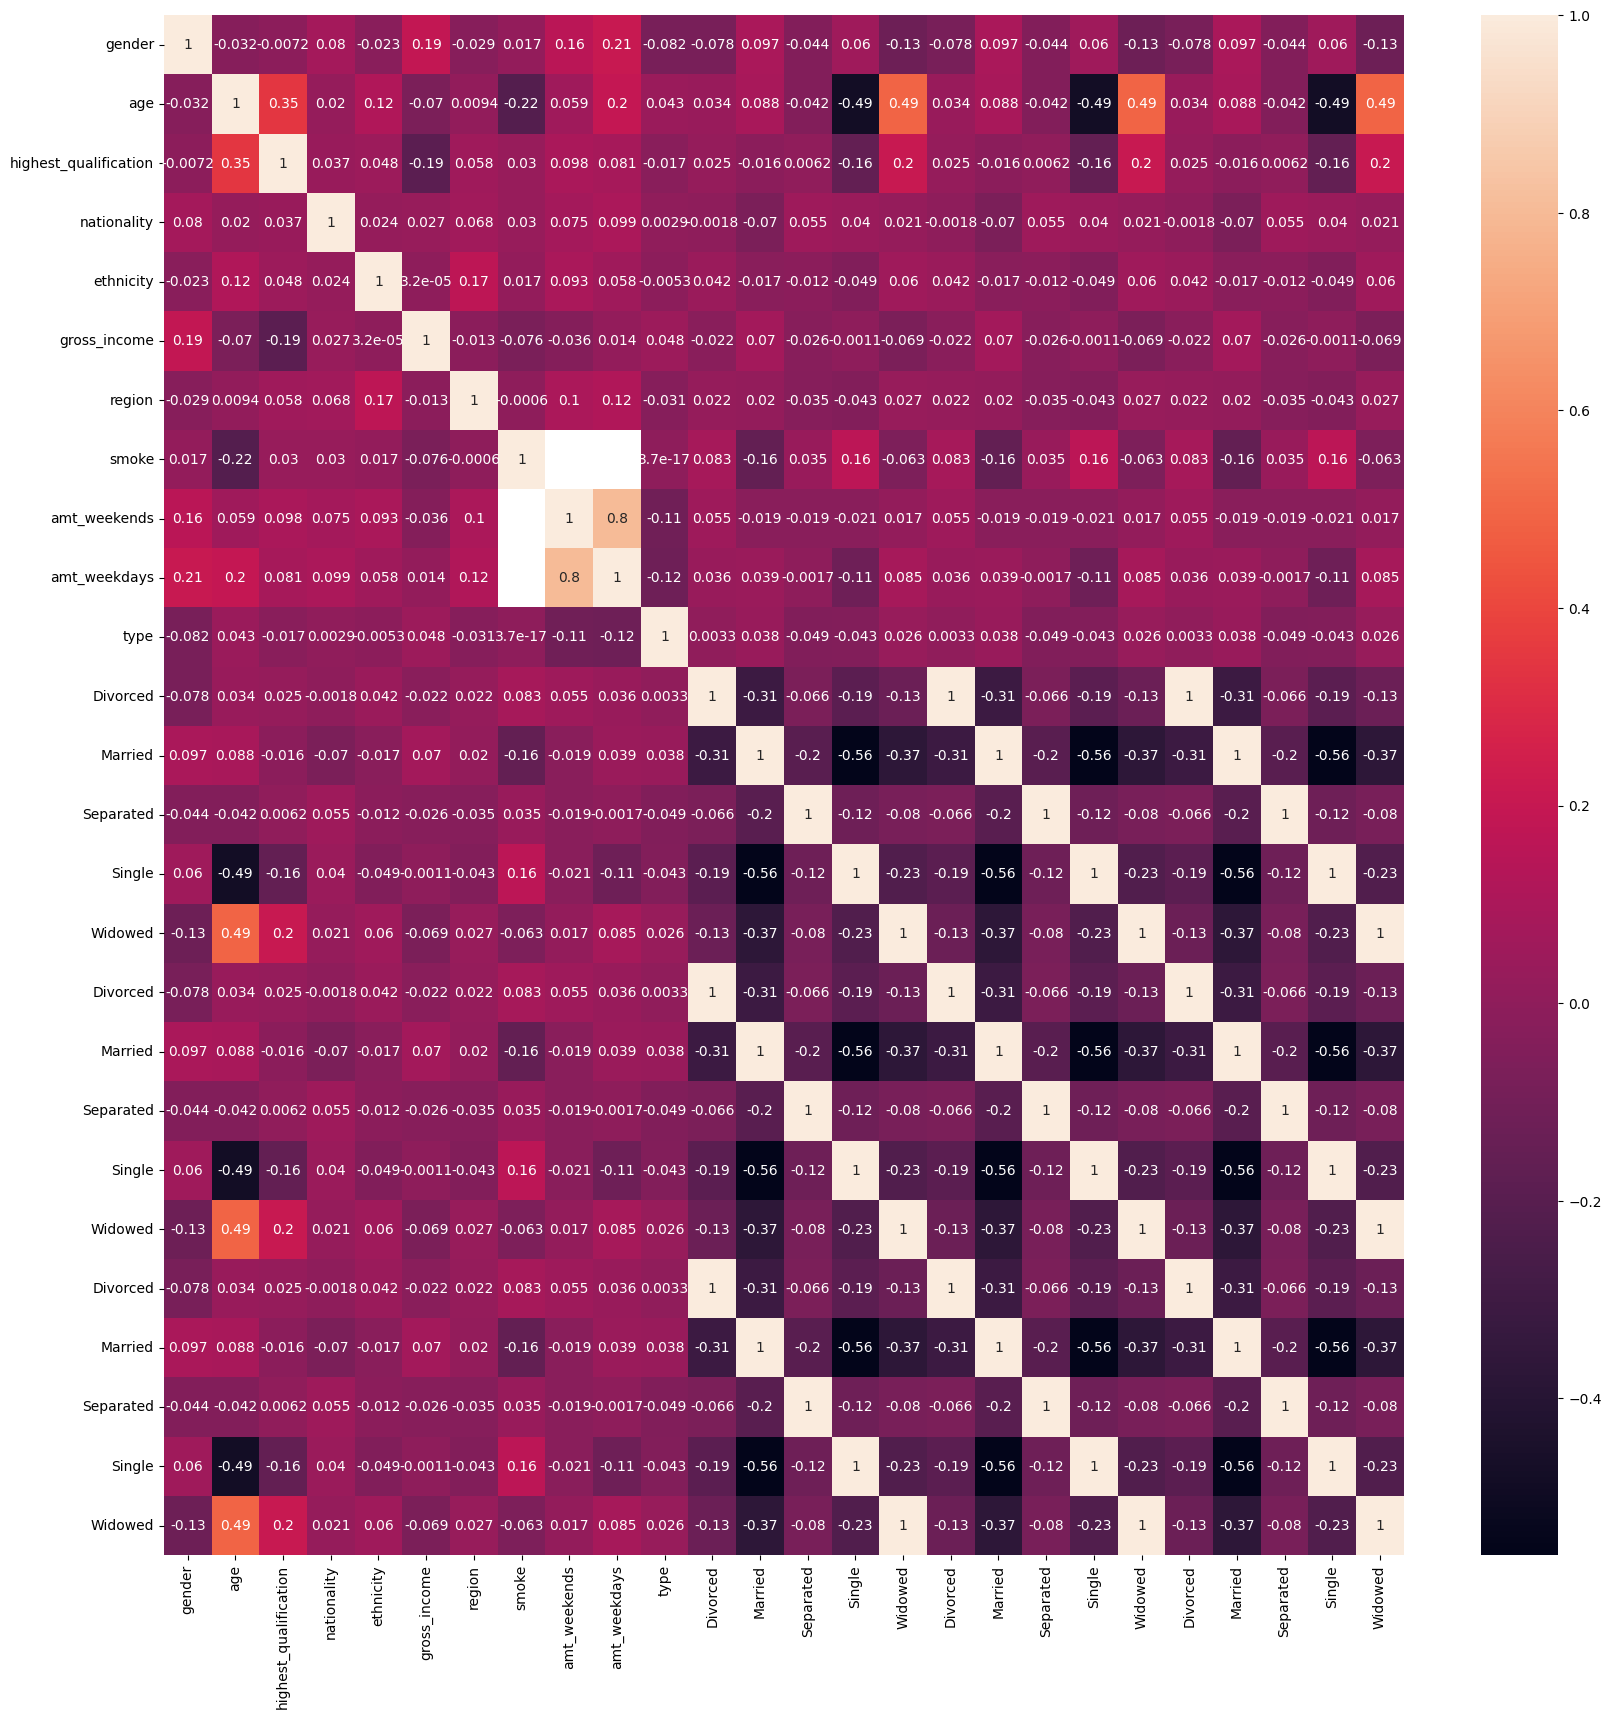

In [63]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: ylabel='Frequency'>

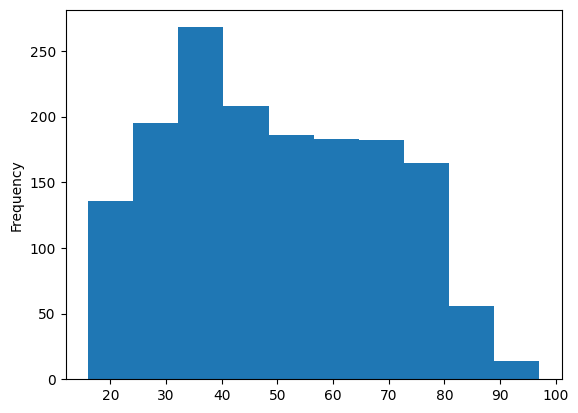

In [64]:
df["age"].plot.hist()

In [65]:
imputer = SimpleImputer(strategy="median")
df[["age"]] = imputer.fit_transform(df[["age"]])
df["age"].isna().sum()

np.int64(0)

In [66]:
df.isna().sum()

gender                      0
age                         0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                        0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
Divorced                    0
Married                     0
Separated                   0
Single                      0
Widowed                     0
dtype: int64

In [70]:
iterative_imputer = IterativeImputer()
imputed_data = iterative_imputer.fit_transform(df[["amt_weekends", "amt_weekdays"]])
df[["amt_weekends", "amt_weekdays"]] = imputed_data
df.isna().sum()

gender                   0
age                      0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
Divorced                 0
Married                  0
Separated                0
Single                   0
Widowed                  0
Divorced                 0
Married                  0
Separated                0
Single                   0
Widowed                  0
Divorced                 0
Married                  0
Separated                0
Single                   0
Widowed                  0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   int64  
 1   age                    1691 non-null   float64
 2   highest_qualification  1691 non-null   int64  
 3   nationality            1691 non-null   int64  
 4   ethnicity              1691 non-null   int64  
 5   gross_income           1691 non-null   float64
 6   region                 1691 non-null   int64  
 7   smoke                  1691 non-null   int64  
 8   amt_weekends           1691 non-null   float64
 9   amt_weekdays           1691 non-null   float64
 10  type                   1691 non-null   float64
 11  Divorced               1691 non-null   bool   
 12  Married                1691 non-null   bool   
 13  Separated              1691 non-null   bool   
 14  Single                 1691 non-null   bool   
 15  Wido

In [74]:
X, y = df.drop(columns="smoke"), df["smoke"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LogisticRegression()
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)

from sklearn import metrics

print("Accuracy:",regressor.score(test_X, test_y))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.7345132743362832
[[245  13]
 [ 77   4]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       258
           1       0.24      0.05      0.08        81

    accuracy                           0.73       339
   macro avg       0.50      0.50      0.46       339
weighted avg       0.64      0.73      0.66       339



C:\Users\anama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
df['smoke'].value_counts()


smoke
0    1270
1     421
Name: count, dtype: int64

In [ ]:
data_smoke = df.loc[df['smoke'] == 1]
data_no_smoke = df.loc[data['smoke'] == 0]
data_no_smoke = data_no_smoke.sample(500)
new_data = pd.concat([data_no_smoke, data_smoke])
new_data = new_data.sample(frac=1)
